# ARMA 모형 모수 추정

다음과 같은 ARMA(p,q) 모형과 샘플 시계열 자료가 있는 경우 최대 우도 추정법(MLE: Maximum Likelihood Estimation)을 사용하여 모형 파라미터 $\phi_i$, $\theta_i$를 구할 수 있다.

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

MLE를 사용하기 위한 우도 함수는 다음과 같다.

$$ 
\begin{eqnarray}
\mathcal{L}(\theta; \{y_j\}) 
&=& \mathcal{L}(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q; y_1, y_2, \cdots, y_N) \\
&=& f_{Y_1,\cdots , Y_N}(y_1, y_2, \cdots, y_N;\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q) \\
\end{eqnarray}
$$

## 확률 과정 모형의 우도 함수

확률 변수와 달리 확률 과정 모형에서는 $y_1, y_2, \cdots, y_N$이라는 샘플 각각의 값이 서로 독립(independent)이 아니므로 주어진 ARMA(p,q) 모형을 사용하여 이 값들이 동시에 나올 결합 확률 밀도 함수를 구해야 한다. 

우선 다음과 같은 초기값 가정을 하자

$$ e_p = e_{p-1} = \cdots = e_{p-q} = 0 $$ 

그런 $e_{p+1}, \cdots, e_N$은 다음 공식에서 구할 수 있다.

$$ e_{p+1}=Y_{p+1}-\phi_1Y_{p}-\phi_2 Y_{p-1} - \cdots - \phi_p Y_{1} $$

$$ e_{p+2}=Y_{p+2}-\phi_1Y_{p+1}-\phi_2Y_{p}-\cdots-\phi_pY_{2}+\theta_1e_{p+1}$$



$e$의 값이 $Y$(샘플)와 $\theta$(주어진 변수값)에서 회귀적으로 결정이 되어버렸기 때문에 $Y_t$는 $Y_{t-1}, \cdots, Y_{t-p}, e_{t-1}, \cdots, e_{t-q}$ 에 의존하는 정규 분포 확률 변수가 된다.


$$
\begin{eqnarray}
Y_{t} 
&\sim& N(y_t; \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p}- \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} , \sigma^2) \\
&=& N(y_t;e_t(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q), \sigma^2) \\
\end{eqnarray}
$$

이 식에서 모수 $\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q$ 들을 백색 잡음 추정값을 통해 간접적으로 영향을 미친다.

전체 우도 함수는 다음과 같아진다.

$$ \mathcal{L}(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q, \sigma^2; y_1, \cdots, y_N) = \prod_{t=p+1}^N N(y_t;e_t(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q), \sigma^2) $$

이 값을 최대화하는 모수 $\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q, \sigma^2$은 수치적 최적화 방법을 통해 계산한다.

## 파이썬을 사용한 ARMA 모수 추정

statsmodels 패키지는 ARMA 모수 추정을 위한 `ARMA`라는 클래스와 이 클래스의 `fit` 메서드를 제공한다. `ARMA` 클래스의 인수로 시계열 샘플과 차수를 넣어 인스턴스를 생성한 뒤 `fit` 메서드를 호출하면 추정 결과값을 가진 `ARMAResults` 타입의 자료를 반환한다.

`ARMAResults`의 세부적인 속성에 대해서는 관련 노트북을 참조한다.

[[school_notebook:ac028b39585e4d0bac57d5e2f5cd5ccd]]

`ARMA` 클래스와 몇가지 이론적 모형에서 시뮬레이션하여 나온 시계열 자료를 사용하여 모수를 측정하여 보자.

### MA(1) 모수 추정의 예

$$ Y_t = e_t + 0.9 e_{t-1} $$

In [1]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [1, 0.9])
y = p.generate_sample(1000)
m = sm.tsa.ARMA(y, (0, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.255
Method:                       css-mle   S.D. of innovations              0.986
Date:                Fri, 04 Nov 2016   AIC                           2816.509
Time:                        06:55:59   BIC                           2831.233
Sample:                             0   HQIC                          2822.105
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0853      0.060     -1.429      0.153      -0.202       0.032
ma.L1.y        0.9174      0.013     70.513      0.000       0.892       0.943
                                    Roots           

### AR(1) 모수 추정의 예

$$ Y_t = 0.9 Y_{t-1} + e_t  $$

In [2]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1, -0.9], [1])
y = p.generate_sample(1000)
m = sm.tsa.ARMA(y, (1, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1404.871
Method:                       css-mle   S.D. of innovations              0.985
Date:                Fri, 04 Nov 2016   AIC                           2815.742
Time:                        06:56:38   BIC                           2830.465
Sample:                             0   HQIC                          2821.337
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4251      0.360     -1.181      0.238      -1.131       0.281
ar.L1.y        0.9144      0.013     72.007      0.000       0.890       0.939
                                    Roots           

### AR(2) 모수 추정의 예

$$ Y_t = 1.5 Y_{t-1} - 0.75 Y_{t-2} + e_t  $$

In [3]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1, -1.5, 0.75], [1])
y = p.generate_sample(1000)
m = sm.tsa.ARMA(y, (2, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1406.159
Method:                       css-mle   S.D. of innovations              0.986
Date:                Fri, 04 Nov 2016   AIC                           2820.319
Time:                        06:57:36   BIC                           2839.950
Sample:                             0   HQIC                          2827.780
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1847      0.124     -1.484      0.138      -0.429       0.059
ar.L1.y        1.4866      0.021     69.795      0.000       1.445       1.528
ar.L2.y       -0.7371      0.021    -34.614      0.0

### ARMA(1,1) 모수 추정의 예

$$ Y_t = 0.6 Y_{t-1} + e_t + 0.3 e_{t-1}  $$

In [4]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1, -0.6], [1, 0.3])
y = p.generate_sample(1000)
m = sm.tsa.ARMA(y, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1405.147
Method:                       css-mle   S.D. of innovations              0.986
Date:                Fri, 04 Nov 2016   AIC                           2818.295
Time:                        06:58:26   BIC                           2837.926
Sample:                             0   HQIC                          2825.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1436      0.103     -1.400      0.162      -0.345       0.057
ar.L1.y        0.6175      0.034     18.294      0.000       0.551       0.684
ma.L1.y        0.2606      0.043      6.090      0.0

## 실제 시계열 자료에 대한 ARMA 모형 계수 추정

이번에는 실제 시계열 자료에 대해 ARMA 모형 계수를 추정해 본다. ARMA 모형의 차수 결정에 대해서는 해당 노트북을 참조한다.

[[school_notebook:b39ccd2da3e64d6e91981e23e01816c4]]

## 황체형성 호르몬 모형 계수 추정

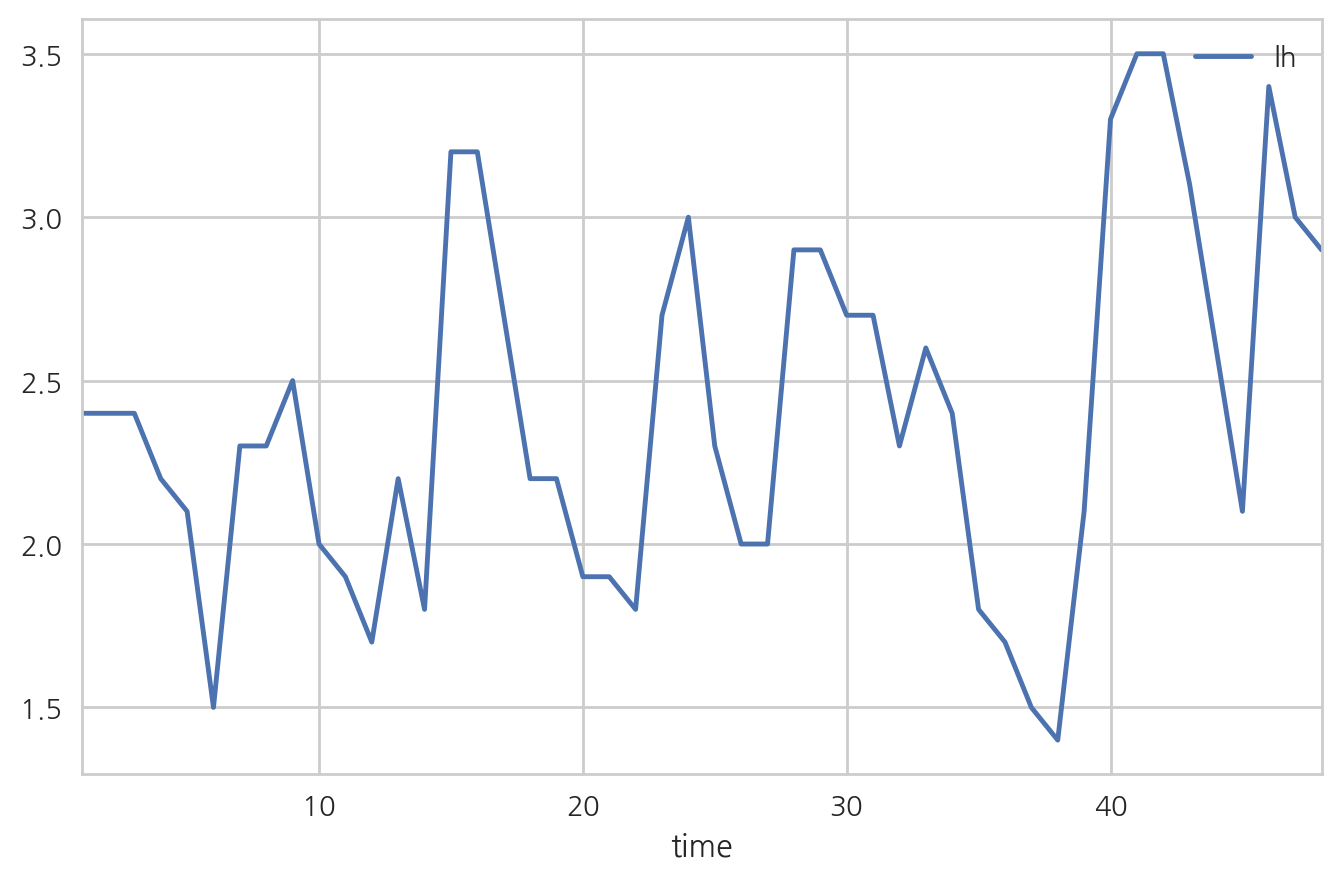

In [1]:
data = sm.datasets.get_rdataset("lh")
df = data.data
df.plot(x="time", y="lh")
plt.show()

이 시계열을 AR(1) 모형으로 보고 모수를 추정한 결과는 다음과 같다.

In [2]:
m = sm.tsa.ARMA(df.lh, (1, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                     lh   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 -29.379
Method:                       css-mle   S.D. of innovations              0.444
Date:                Thu, 06 Jul 2017   AIC                             64.758
Time:                        15:39:44   BIC                             70.372
Sample:                             0   HQIC                            66.880
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4133      0.147     16.460      0.000       2.126       2.701
ar.L1.lh       0.5739      0.116      4.939      0.000       0.346       0.802
                                    Roots           

이 모수를 사용하여 다시 시뮬레이션한 결과는 다음과 같다. 굵은 실선이 원래 자료이다.

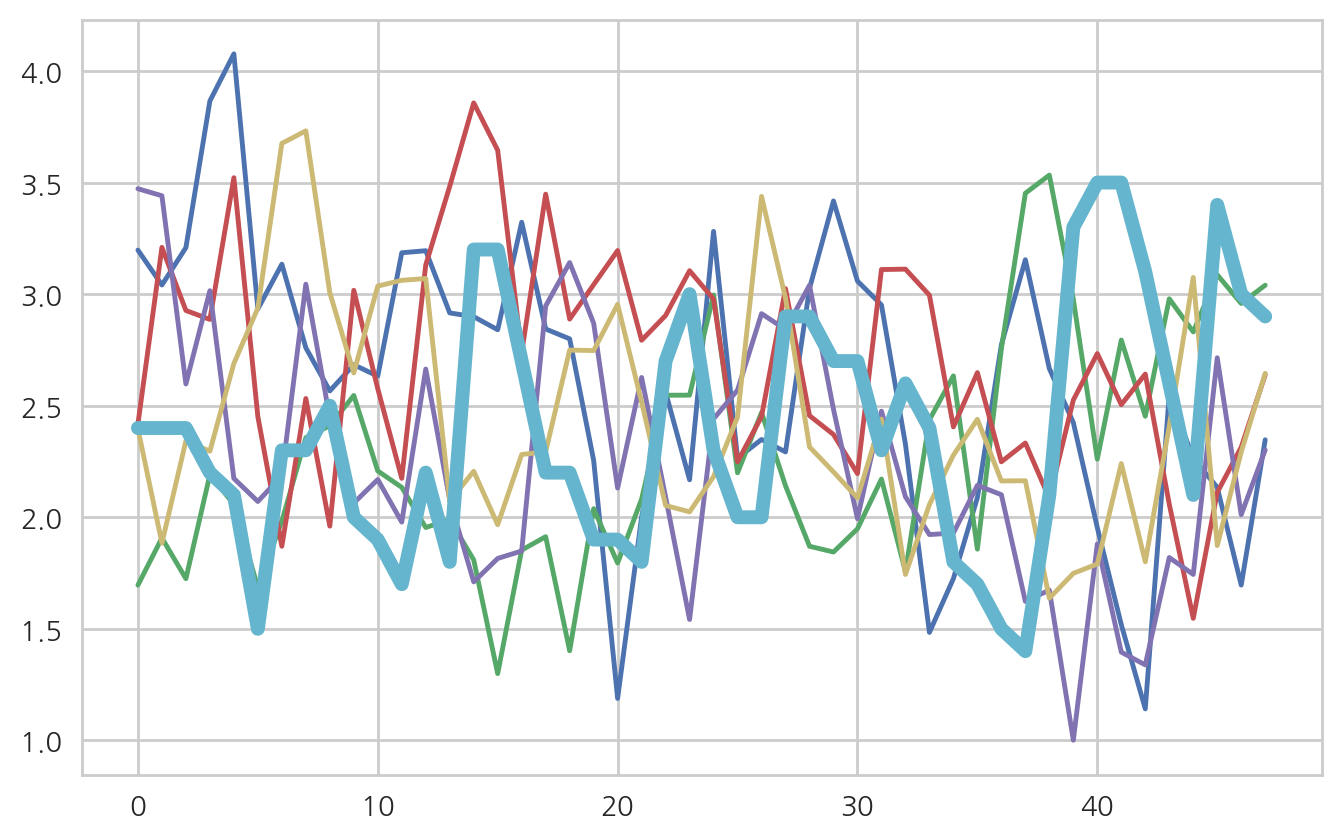

In [3]:
np.random.seed(0)
p = sm.tsa.ArmaProcess(np.r_[1, -r.arparams], [1])
for i in range(5):
    y = p.generate_sample(len(df)) * np.sqrt(r.sigma2) + r.params[0]
    plt.plot(y)  
plt.plot(df.lh, lw=5)
plt.show()

MA(1) 모형 혹은 ARMA(1,1) 모형으로 추정한 결과는 다음과 같다. AR(1) 모형보다 성능이 좋지 않음을 알 수 있다.

In [4]:
m = sm.tsa.ARMA(df.lh, (0, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                     lh   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                 -31.052
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 06 Jul 2017   AIC                             68.104
Time:                        15:40:26   BIC                             73.717
Sample:                             0   HQIC                            70.225
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4050      0.098     24.576      0.000       2.213       2.597
ma.L1.lh       0.4810      0.094      5.093      0.000       0.296       0.666
                                    Roots           

In [5]:
m = sm.tsa.ARMA(df.lh, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                     lh   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                 -28.762
Method:                       css-mle   S.D. of innovations              0.439
Date:                Thu, 06 Jul 2017   AIC                             65.524
Time:                        15:40:27   BIC                             73.009
Sample:                             0   HQIC                            68.353
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4101      0.136     17.754      0.000       2.144       2.676
ar.L1.lh       0.4522      0.177      2.556      0.014       0.105       0.799
ma.L1.lh       0.1982      0.171      1.162      0.2

## 호흡기질환 사망자수

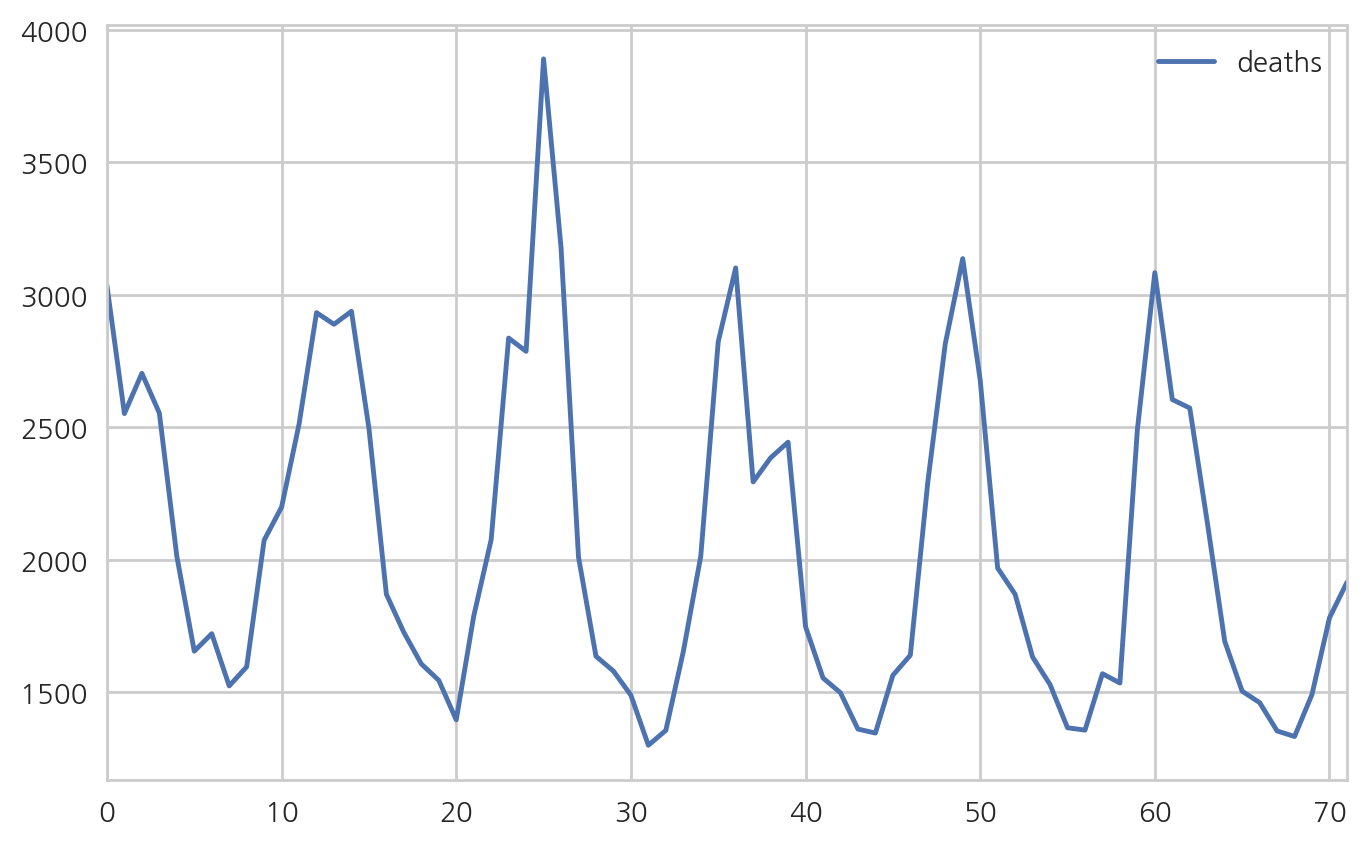

In [8]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.plot(y="deaths")
plt.show()

이 시계열을 AR(2) 모형으로 보고 모수를 추정한 결과는 다음과 같다.

In [12]:
m = sm.tsa.ARMA(df.deaths.astype(float), (2, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 deaths   No. Observations:                   72
Model:                     ARMA(2, 0)   Log Likelihood                -523.657
Method:                       css-mle   S.D. of innovations            345.376
Date:                Thu, 06 Jul 2017   AIC                           1055.314
Time:                        15:44:24   BIC                           1064.421
Sample:                             0   HQIC                          1058.939
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2075.8653    123.165     16.854      0.000    1834.466    2317.264
ar.L1.deaths     1.1199      0.106     10.606      0.000       0.913       1.327
ar.L2.deaths    -0.4478      0.105     -4.24

이 모수를 사용하여 다시 시뮬레이션한 결과는 다음과 같다. 굵은 실선이 원래 자료이다.

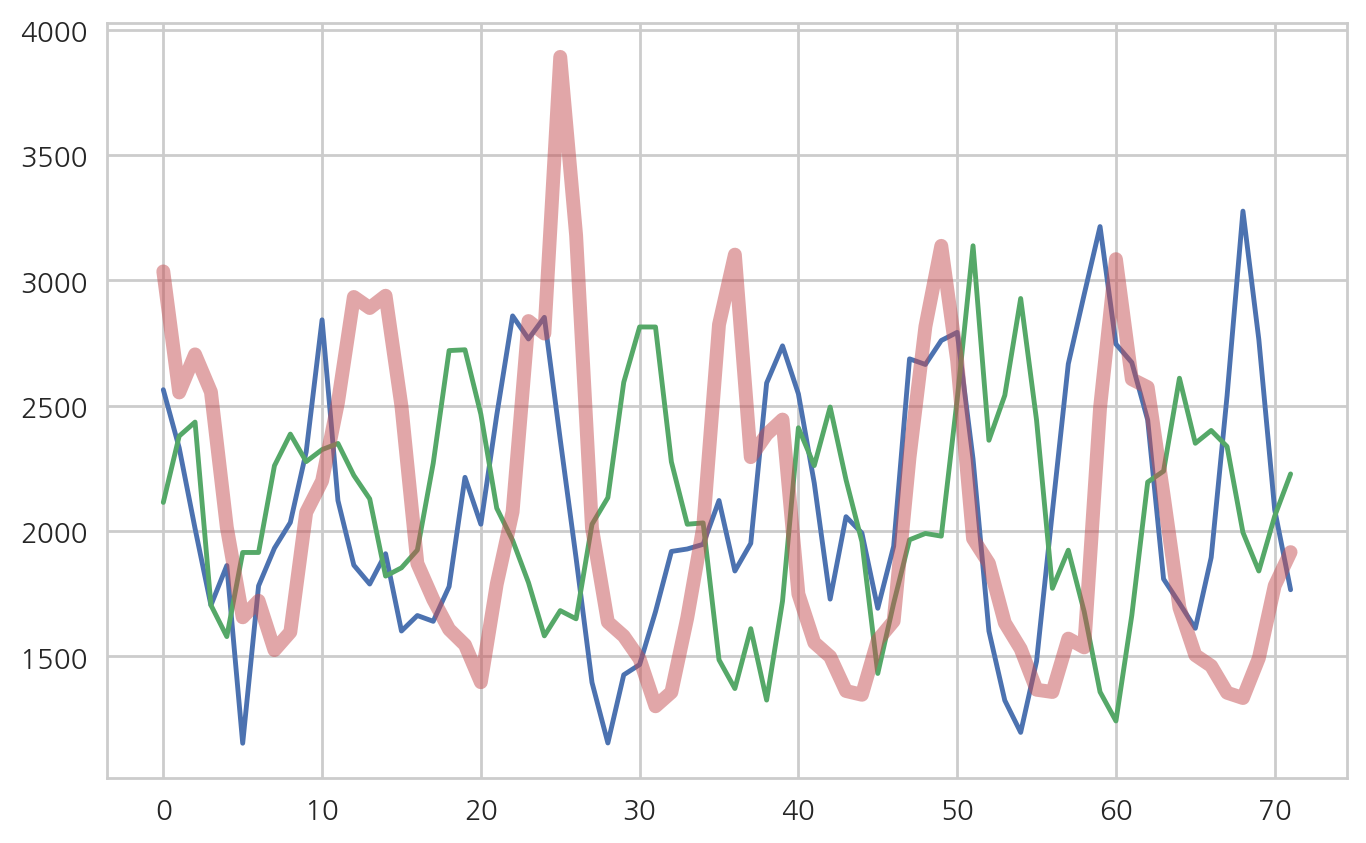

In [17]:
np.random.seed(1)
p = sm.tsa.ArmaProcess(np.r_[1, -r.arparams], [1])
for i in range(2):
    y = p.generate_sample(len(df)) * np.sqrt(r.sigma2) + r.params[0]
    plt.plot(y)  
plt.plot(df.deaths, lw=5, alpha=0.5)
plt.show()

AR(3), AR(4) 모형을 사용해도 그다지 성능은 좋아지지 않는다.

In [14]:
m = sm.tsa.ARMA(df.deaths.astype(float), (3, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 deaths   No. Observations:                   72
Model:                     ARMA(3, 0)   Log Likelihood                -521.837
Method:                       css-mle   S.D. of innovations            336.434
Date:                Thu, 06 Jul 2017   AIC                           1053.674
Time:                        15:44:33   BIC                           1065.057
Sample:                             0   HQIC                          1058.205
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2069.8173     97.677     21.190      0.000    1878.374    2261.260
ar.L1.deaths     1.0106      0.117      8.635      0.000       0.781       1.240
ar.L2.deaths    -0.1901      0.168     -1.13

In [15]:
m = sm.tsa.ARMA(df.deaths.astype(float), (4, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 deaths   No. Observations:                   72
Model:                     ARMA(4, 0)   Log Likelihood                -515.607
Method:                       css-mle   S.D. of innovations            307.046
Date:                Thu, 06 Jul 2017   AIC                           1043.214
Time:                        15:44:38   BIC                           1056.874
Sample:                             0   HQIC                          1048.652
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2064.2741     62.942     32.796      0.000    1940.909    2187.639
ar.L1.deaths     0.9117      0.110      8.288      0.000       0.696       1.127
ar.L2.deaths    -0.2733      0.156     -1.74